# Time spectrum

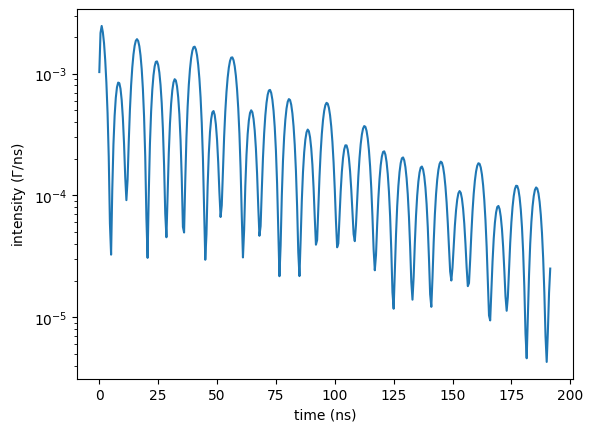

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

iron = nx.Material.Template(nx.lib.material.Fe)

layer_Fe = nx.Layer(id = "Fe layer",
                    material = iron,
                    thickness = 3000)

site = nx.Hyperfine(magnetic_field = 33,
                    magnetic_theta = 90,
                    magnetic_phi = 0,
                    quadrupole = 0.6)

site.SetRandomDistribution("efg", "3D", 401)

iron.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_length = 200,
                                time_step = 0.5,
                                bunch_spacing = 192.2, # PETRA III bunch spacing
                                id = "my time spectrum")

#%prun
timeaxis, intensity = time_spectrum.Calculate()

plt.semilogy(timeaxis, intensity)
plt.xlabel('time (ns)')
plt.ylabel(r'intensity ($\Gamma$/ns)')
plt.show()

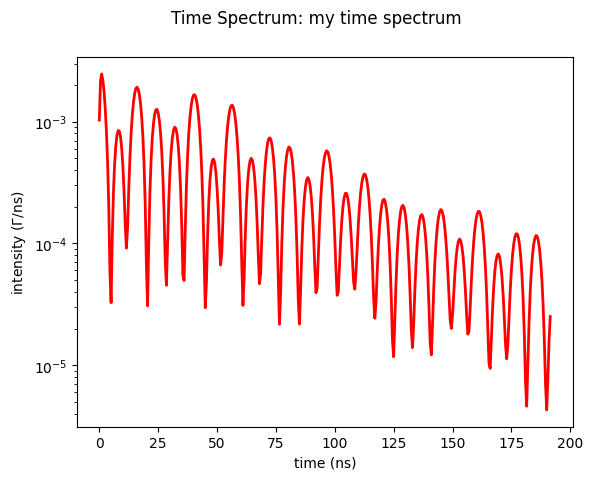

In [2]:
time_spectrum.Plot(data=False, errors=True)

In [3]:
intensity *= 1000000

print(len(intensity))

time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_data = timeaxis,
                                intensity_data = intensity,
                                time_length = 200,
                                time_step = 0.2,
                                bunch_spacing = 192.2, # PETRA III bunch spacing
                                id = "my time spectrum")

timeaxis, intensity = time_spectrum.Calculate()

384


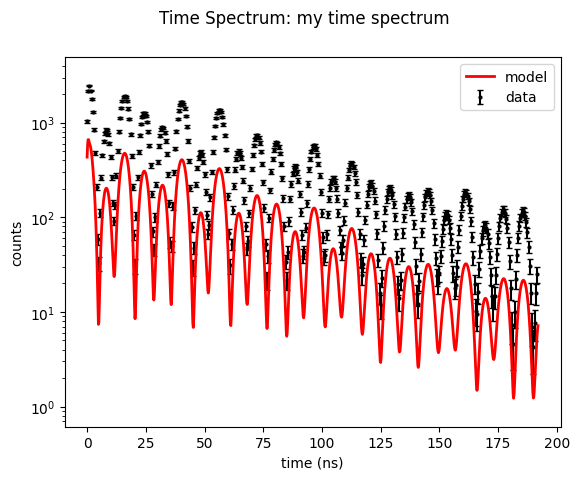

In [4]:
time_spectrum.Plot(errors=True)

In [5]:
fit = nx.Fit([time_spectrum])

fit.options.method = "Subplex"

#fit.options.method = "PagmoDiffEvol"

fit()


Run Fit instance with id:  

Starting fit with 1 measurement data set(s) and 1 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                   TS scaling |              246052 |                0 |      2.46052e+09

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).


Calling NLopt solver with fit method Subplex

Termination: parameter tolerance reached.

  cost = 9.790724e+01
  iterations: 44

Gradient error analysis.


Fit performed with algorithm:
Subplex
Error analysis:
Gradient

Using 1 fit parameter(s):

  no. |                           id |          fit value |   +/- std dev | initial value |          min |          max
    0 |                   TS scaling |        1.01881e+06 |      0.122466 |        246052 |            0 |  2.46052e+09

Correlation matrix:

  no. |        0 
 -----|---------
    0 |    1.000 

Using 0 equality constraint(s) on parameter(s):

and 0 ine

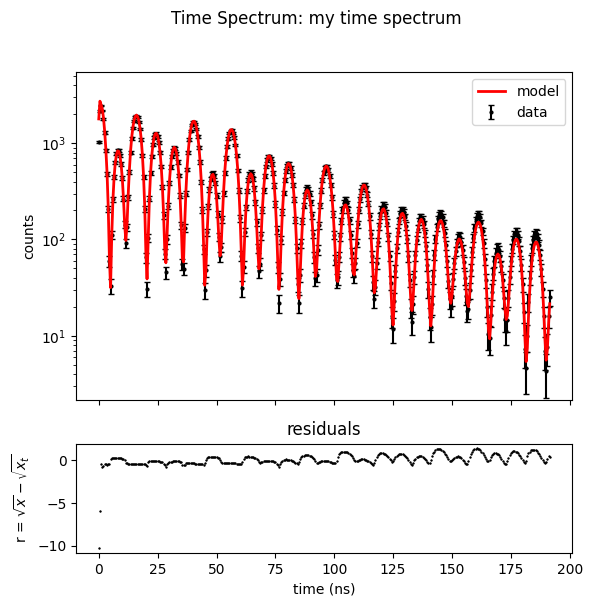

In [6]:
time_spectrum.Plot(errors=True)